In [1]:
import numpy as np
from tqdm import tqdm

# --- Parameters ---
L = 16                          # Lattice size: LxL = 256 spins
N = L * L
K = 0.3                         # Coupling constant (inverse temperature)
thermalization = 100000
num_configs_total = 100000     # Total number of configurations
configs_per_chunk = 100        # Store this many configs before writing to disk
separation = 1000              # Sweeps between saved configurations

filename = "configurations_2d.dat"

# --- Initialize 2D spin configuration (all +1) ---
s = np.ones((L, L), dtype=int)

# --- Helper to compute neighbor indices with PBC ---
def neighbors(i, j):
    return [
        ((i + 1) % L, j),
        ((i - 1) % L, j),
        (i, (j + 1) % L),
        (i, (j - 1) % L)
    ]

# --- Metropolis update ---
def update(s):
    i = np.random.randint(L)
    j = np.random.randint(L)

    spin = s[i, j]
    sum_neighbors = sum(s[x, y] for x, y in neighbors(i, j))
    delta_E = 2 * spin * sum_neighbors

    if delta_E <= 0 or np.random.rand() < np.exp(-K * delta_E):
        s[i, j] *= -1

# --- Thermalization ---
for _ in tqdm(range(thermalization), desc="Thermalizing"):
    update(s)

# --- Generate configurations and write in chunks ---
with open(filename, "w") as file:
    num_saved = 0

    for _ in tqdm(range(num_configs_total // configs_per_chunk), desc="Generating configs"):
        walk_chunk = []

        for _ in range(configs_per_chunk):
            for _ in range(separation):
                update(s)
            walk_chunk.append(s.copy())

        # --- Write chunk to file ---
        for config in walk_chunk:
            flat_config = config.flatten()
            config_line = " ".join(map(str, flat_config)) + "\n"
            file.write(config_line)

        # Optionally reset memory (e.g., del and recreate `walk_chunk`) — Python GC handles it, so this is fine as-is


Generating configs: 100%|███████████████████| 1000/1000 [05:23<00:00,  3.09it/s]


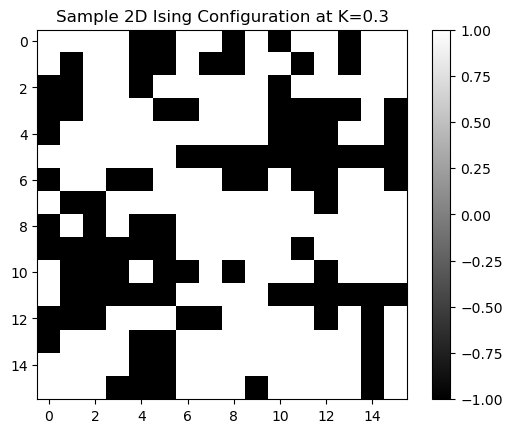

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Read one config and reshape
with open("configurations_2d.dat") as f:
    line = f.readline()
    config = np.array([int(x) for x in line.split()]).reshape((16, 16))

# Plot
plt.imshow(config, cmap='gray', interpolation='nearest')
plt.title("Sample 2D Ising Configuration at K=0.3")
plt.colorbar()
plt.savefig("Sample_2D_Ising_Configuration_K=0.3.pdf")
plt.show()